In [1]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))
from db import helper as db_helper
from common import treat_data, extract_period_returns, extract_volatility_of_prices, reshape_df
import pandas as pd

In [2]:
session = db_helper.start_session()
df = pd.read_sql_table('spot_rates', session.bind)

2019-05-04 15:34:00,927 INFO sqlalchemy.engine.base.Engine select version()
2019-05-04 15:34:00,928 INFO sqlalchemy.engine.base.Engine {}
2019-05-04 15:34:00,932 INFO sqlalchemy.engine.base.Engine select current_schema()
2019-05-04 15:34:00,935 INFO sqlalchemy.engine.base.Engine {}
2019-05-04 15:34:00,939 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-05-04 15:34:00,942 INFO sqlalchemy.engine.base.Engine {}
2019-05-04 15:34:00,945 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-05-04 15:34:00,946 INFO sqlalchemy.engine.base.Engine {}
2019-05-04 15:34:00,950 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2019-05-04 15:34:00,950 INFO sqlalchemy.engine.base.Engine {}
2019-05-04 15:34:00,953 INFO sqlalchemy.engine.base.Engine SELECT c.relname FROM pg_class c JOIN pg_namespace n ON n.oid = c.relnamespace WHERE n.nspname = %(schema)s AND c.relkind = 'r'
2019-05-04 15:

/anaconda3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


2019-05-04 15:34:01,046 INFO sqlalchemy.engine.base.Engine {'table_oid': 16656}
2019-05-04 15:34:01,049 INFO sqlalchemy.engine.base.Engine 
            SELECT
                pgd.description as table_comment
            FROM
                pg_catalog.pg_description pgd
            WHERE
                pgd.objsubid = 0 AND
                pgd.objoid = %(table_oid)s
        
2019-05-04 15:34:01,050 INFO sqlalchemy.engine.base.Engine {'table_oid': 16656}
2019-05-04 15:34:01,054 INFO sqlalchemy.engine.base.Engine SELECT spot_rates.id, spot_rates.url, spot_rates.day, spot_rates.month, spot_rates.year, spot_rates.base_currency, spot_rates.target_currency, spot_rates.base_value, spot_rates.target_spot_rate, spot_rates.target_52wk_high, spot_rates.target_52wk_low, spot_rates.created_at, spot_rates.updated_at 
FROM spot_rates
2019-05-04 15:34:01,055 INFO sqlalchemy.engine.base.Engine {}


In [3]:
df.head()

,id,url,day,month,year,base_currency,target_currency,base_value,target_spot_rate,target_52wk_high,target_52wk_low,created_at,updated_at
0,1,https://www.bankofengland.co.uk/boeapps/databa...,31,5,2007,USD,Australian Dollar,1.0,1.2082,NaN,NaN,2018-12-26 21:40:45.758406,NaT
1,2,https://www.bankofengland.co.uk/boeapps/databa...,31,5,2007,USD,Canadian Dollar,1.0,1.0691,NaN,NaN,2018-12-26 21:40:45.774056,NaT
2,3,https://www.bankofengland.co.uk/boeapps/databa...,31,5,2007,USD,Chinese Yuan,1.0,7.6450,NaN,NaN,2018-12-26 21:40:45.783171,NaT
3,4,https://www.bankofengland.co.uk/boeapps/databa...,31,5,2007,USD,Cyprus Pound,1.0,0.4336,NaN,NaN,2018-12-26 21:40:45.788855,NaT
4,5,https://www.bankofengland.co.uk/boeapps/databa...,31,5,2007,USD,Czech Koruna,1.0,21.0323,NaN,NaN,2018-12-26 21:40:45.802340,NaT


In [4]:
df = treat_data(df)

In [5]:
df.head()

,date,year,month,week,day,base_currency,target_currency_symbol,target_spot_rate
0,2007-05-31,2007,5,22,31,USD,AUD,1.2082
1,2007-05-31,2007,5,22,31,USD,CAD,1.0691
2,2007-05-31,2007,5,22,31,USD,Yuan,7.6450
3,2007-05-31,2007,5,22,31,USD,CYP,0.4336
4,2007-05-31,2007,5,22,31,USD,CZK,21.0323


In [6]:
# Split DF by currency
gbp_df = df[(df['base_currency']=='GBP')]
usd_df = df[(df['base_currency']=='USD')]
eur_df = df[(df['base_currency']=='EUR')]

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,8))
plt.style.use('seaborn-whitegrid')

<Figure size 1152x576 with 0 Axes>

In [ ]:
gbp_usd = gbp_df[gbp_df['target_currency_symbol']=='USD']
gbp_eur = gbp_df[gbp_df['target_currency_symbol']=='EUR']
gbp_jpy = gbp_df[gbp_df['target_currency_symbol']=='JPY']

ax = sns.lineplot(x='date', y='target_spot_rate', data=gbp_usd, label='1 GBP = USD')
ax = sns.lineplot(x='date', y='target_spot_rate', data=gbp_eur, label='1 GBP = EUR')
# ax = sns.lineplot(x='date', y='target_spot_rate', data=gbp_jpy, label='1 GBP = JPY')

plt.show()

In [ ]:
# This looks like the actually spot rates observed on xe.com

In [7]:
df = extract_period_returns(gbp_df)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [8]:
df.head()

,date,target_spot_rate,one_day_future_return,one_week_future_return,one_month_future_return,one_year_future_return,target_currency_symbol,day,week,month,year
0,2000-01-04,2.4866,0.002775,0.007641,0.010215,0.062012,AUD,4,1,1,2000
1,2000-01-05,2.4935,0.008462,0.002286,0.007419,0.050010,AUD,5,1,1,2000
2,2000-01-06,2.5146,-0.006880,-0.016185,-0.001034,0.041199,AUD,6,1,1,2000
3,2000-01-07,2.4973,0.000000,-0.019221,0.002363,0.048412,AUD,7,1,1,2000
4,2000-01-08,2.4973,0.000000,-0.019221,0.016938,0.060425,AUD,8,1,1,2000


In [9]:
df = extract_volatility_of_prices(df)

In [10]:
df.head()

,date,target_spot_rate,one_day_future_return,one_week_future_return,one_month_future_return,one_year_future_return,target_currency_symbol,day,week,month,year,1w_vol,1m_vol,1y_vol
0,2000-01-04,2.4866,0.002775,0.007641,0.010215,0.062012,AUD,4,1,1,2000,0.00924,0.025274,0.079002
1,2000-01-05,2.4935,0.008462,0.002286,0.007419,0.050010,AUD,5,1,1,2000,0.00924,0.025274,0.079002
2,2000-01-06,2.5146,-0.006880,-0.016185,-0.001034,0.041199,AUD,6,1,1,2000,0.00924,0.025274,0.079002
3,2000-01-07,2.4973,0.000000,-0.019221,0.002363,0.048412,AUD,7,1,1,2000,0.00924,0.025274,0.079002
4,2000-01-08,2.4973,0.000000,-0.019221,0.016938,0.060425,AUD,8,1,1,2000,0.00924,0.025274,0.079002


In [11]:
df = reshape_df(df)

In [12]:
df.head()

,date,day,week,month,year,AUD_target_spot_rate,AUD_1w_vol,AUD_1m_vol,AUD_1y_vol,AUD_one_day_future_return,...,EUR_one_month_future_return,EUR_one_year_future_return,JPY_target_spot_rate,JPY_1w_vol,JPY_1m_vol,JPY_1y_vol,JPY_one_day_future_return,JPY_one_week_future_return,JPY_one_month_future_return,JPY_one_year_future_return
0,2000-01-04,4,1,1,2000,2.4866,0.00924,0.025274,0.079002,0.002775,...,0.021419,-0.004221,168.3929,1.937709,1.469603,6.667391,0.010986,0.034441,0.012634,0.023487
1,2000-01-05,5,1,1,2000,2.4935,0.00924,0.025274,0.079002,0.008462,...,0.022191,-0.009520,170.2429,1.937709,1.469603,6.667391,0.018823,0.023345,0.001629,0.020324
2,2000-01-06,6,1,1,2000,2.5146,0.00924,0.025274,0.079002,-0.006880,...,0.018403,-0.013190,173.4474,1.937709,1.469603,6.667391,-0.004639,0.009821,-0.016876,0.001474
3,2000-01-07,7,1,1,2000,2.4973,0.00924,0.025274,0.079002,0.000000,...,0.021183,-0.012446,172.6427,1.937709,1.469603,6.667391,0.000000,0.004277,-0.001786,0.006142
4,2000-01-08,8,1,1,2000,2.4973,0.00924,0.025274,0.079002,0.000000,...,0.026652,-0.008234,172.6427,1.937709,1.469603,6.667391,0.000000,0.004277,0.022136,0.008593


In [13]:
df.shape

(6523, 45)

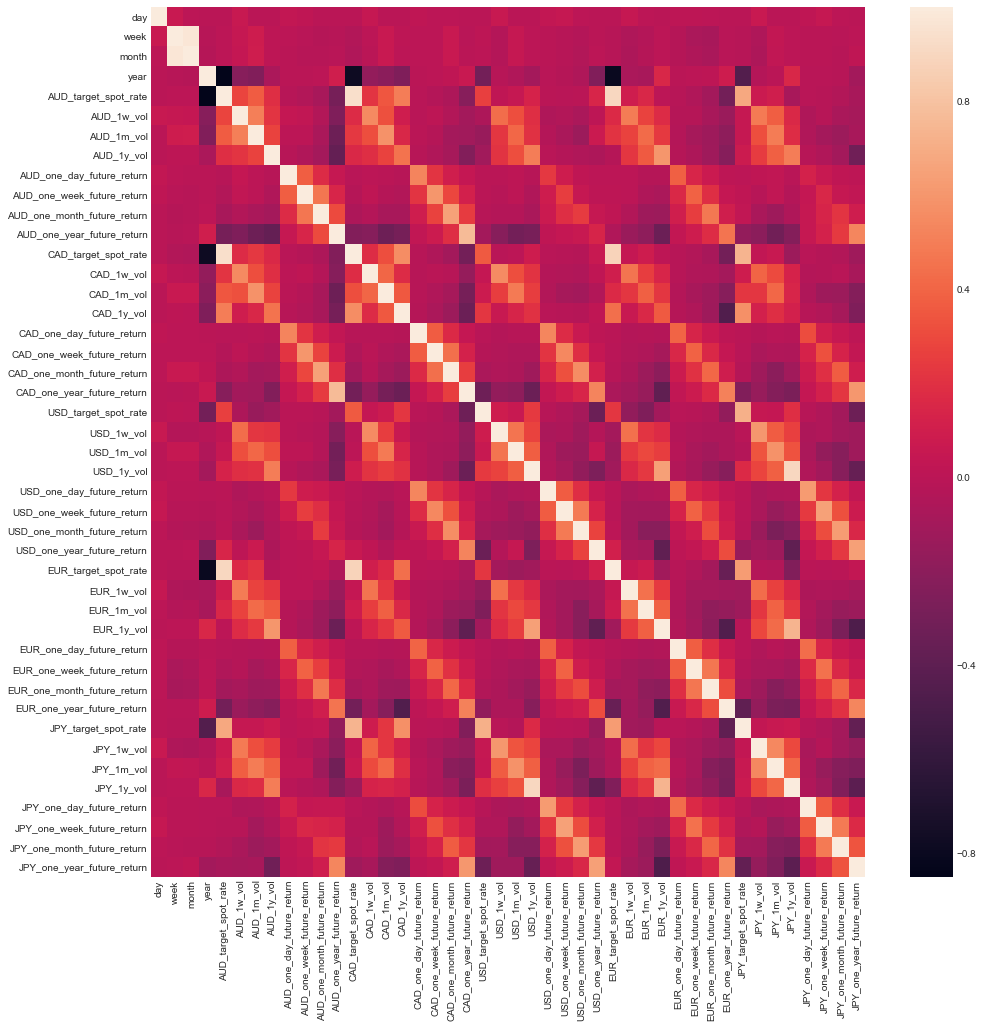

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
# plt.style.use('seaborn-whitegrid')
# plt.matshow(df.corr())
# plt.show()
ax = sns.heatmap(df.corr())

In [23]:
df.corr()

,day,week,month,year,AUD_target_spot_rate,AUD_1w_vol,AUD_1m_vol,AUD_1y_vol,AUD_one_day_future_return,AUD_one_week_future_return,...,EUR_one_month_future_return,EUR_one_year_future_return,JPY_target_spot_rate,JPY_1w_vol,JPY_1m_vol,JPY_1y_vol,JPY_one_day_future_return,JPY_one_week_future_return,JPY_one_month_future_return,JPY_one_year_future_return
day,1.000000,0.065569,0.007184,-0.004063,1.301121e-03,0.054523,0.001783,0.002512,0.032255,0.021943,...,0.004945,-0.000318,-0.001281,0.061330,-0.000147,0.001984,0.023647,0.052752,0.002624,0.001275
week,0.065569,1.000000,0.971632,-0.016580,3.025630e-03,0.047875,0.088040,0.016093,0.003498,-0.006330,...,-0.081065,-0.008426,-0.012143,-0.054946,0.035050,0.004700,0.001453,-0.000128,-0.011016,0.009589
month,0.007184,0.971632,1.000000,-0.019629,3.392452e-03,0.045042,0.092021,0.012941,-0.001082,-0.015348,...,-0.071383,-0.005473,-0.014330,-0.058665,0.031361,0.006457,0.001521,0.002120,-0.012492,0.017924
year,-0.004063,-0.016580,-0.019629,1.000000,-8.502124e-01,-0.221080,-0.250257,-0.069293,-0.000881,0.000116,...,0.014831,0.089007,-0.447793,-0.029220,-0.004542,0.147963,-0.004661,-0.010645,-0.018145,-0.101275
AUD_target_spot_rate,0.001301,0.003026,0.003392,-0.850212,1.000000e+00,0.281627,0.370008,0.189672,-0.014131,-0.036896,...,-0.100888,-0.306040,0.680488,0.072839,0.100149,-0.081846,-0.005811,-0.018092,-0.039143,-0.078383
AUD_1w_vol,0.054523,0.047875,0.045042,-0.221080,2.816269e-01,1.000000,0.504691,0.217834,0.039922,0.027522,...,-0.078037,-0.141551,0.048486,0.485175,0.375604,0.158573,-0.054134,-0.017292,-0.070939,-0.085807
AUD_1m_vol,0.001783,0.088040,0.092021,-0.250257,3.700084e-01,0.504691,1.000000,0.272110,0.009753,0.003816,...,-0.125877,-0.189333,0.047790,0.314130,0.487575,0.181357,-0.045544,-0.096581,-0.129478,-0.077760
AUD_1y_vol,0.002512,0.016093,0.012941,-0.069293,1.896722e-01,0.217834,0.272110,1.000000,-0.016359,-0.045838,...,-0.118311,-0.227818,0.077190,0.247930,0.378598,0.496998,-0.017908,-0.045500,-0.099393,-0.317975
AUD_one_day_future_return,0.032255,0.003498,-0.001082,-0.000881,-1.413111e-02,0.039922,0.009753,-0.016359,1.000000,0.371908,...,0.068526,0.014222,0.006874,0.021044,0.026890,-0.010854,0.122037,0.054943,0.018081,0.011220
AUD_one_week_future_return,0.021943,-0.006330,-0.015348,0.000116,-3.689604e-02,0.027522,0.003816,-0.045838,0.371908,1.000000,...,0.189446,0.040227,0.019151,-0.016781,0.026666,-0.032620,0.040122,0.150482,0.050652,0.029918


In [ ]:
# START HERE